In [1]:
import pandas as pd

kanban_df = pd.read_excel('data/2017kanban.xlsx')
print(kanban_df.shape)

(46918, 24)


## Return the standard assigned tug

In [2]:
###Index(['船舶編號', '航次', '航行狀態(I進港O出港T移泊)', '引水申請時間', '引水人出發時間', '英文船名', '中文船名',
###       '港口(1/2)', '移泊地', '靠泊地', '引水人姓名1', '引水人姓名2', '拖船編號1', '拖船編號2', '拖船編號3',
###       '實際靠妥時間', '離開泊地時間', '港代理簡稱', '引水人上船時間', '引水人離船時間', '總噸位', '前吃水', '後吃水',
###       '靠泊狀況(L左靠，R右靠，0不指定)'],
###      dtype='object')
###
def tug_to_hp(no):
    ##缺568拖船資訊
    tuginfo = {143: 1800,
               145: 1800, 
               151: 2400,
               152: 2400,
               153: 2400,
               155: 2400,
               112: 2400,
               241: 2400,
               245: 2400,
               321: 3200,
               322: 3200,
               101: 3200,
               302: 3200,
               104: 3200,
               106: 3200,
               108: 3200,
               109: 3200,
               303: 3200,
               306: 3200,
               308: 3200,
               301: 3200,
               161: 4000,
               162: 4000,
               163: 4000,
               165: 4000,
               401: 4000,
               451: 4000,
               171: 5200,
               172: 5200,
               181: 5200,
               182: 5200}
    
    for k in tuginfo:
        if no == k:
            return tuginfo[k]     
    ### return 0 means matching fail
    return 0

def mismatch(tug,w):
    tug_len  = len(tug)
    
    ## It means the mismatch
    if tug_len == 0:
        return True
        
    elif w < 5000:
        if tug_len != 1:
            return True
        if tug[0] != 1800:
            return True
    
    elif w < 10000:
        if tug_len > 2:
            return True
        elif tug_len == 1:
            if tug[0] != 2400:
                return True
        elif tug_len == 2:
            if tug[0] != 1800 or tug[1] != 1800:
                return True
        
    elif w < 15000:
        if tug_len != 2:
            return True
        elif tug[0] != 1800 or tug[1] != 2400:
            return True
        
    elif w  < 30000:
        if tug_len != 2:
            return True
        if tug[0] != 2400 or tug[1] != 3200:
            return True
        
    elif w < 45000:
        if tug_len == 1:
            return True
        elif tug_len is 2:
            if tug[0] != 3200 or tug[1] != 3200:
                return True
        elif tug_len is 3:
            if tug[0] != 2400 or tug[1] != 2400 or tug[2] != 2400:
                return True
            
    elif w < 60000:
        if tug_len <= 1:
            return True
        elif tug[0] < 3200:
            return True
        
    elif w < 100000:
        if tug_len < 3:
            return True
        elif tug[0] < 4000:
            return True
    else:
        if tug_len < 1:
            return True
        elif tug[0] != 5200:
            return True
 
    return False

In [14]:
def base(s,b):
    if s == b:
        return 0
    elif s > b:
        return 1
    else:
        return -1

def count_mismatch(tug,w):
    tug_len  = len(tug)
    
    ## It means the mismatch
    s = sum(tug)
    
    if w < 5000:
        return base(s,1800)
    
    elif w < 10000:
        if tug_len >= 2:
            return base(s,3600)
                
        elif tug_len == 1:
            return base(s,2400)
        
    elif w < 15000:
        return base(s,4200)
        
    elif w  < 30000:
        return base(s,5600)
        
    elif w < 45000:
        if tug_len == 3 :
            return base(s,7200)
        
        elif tug_len <= 2:
            return base(s,6400)
            
    elif w < 60000:
        if tug_len <= 1:
            return base(s,4000)
        
        else:
            return base(s,6400)
        
    elif w < 100000:
        return base(s,12000)
    
    else:
        return base(s,10400)
 
    return False
    

In [9]:
def tug_type(tug_no):
    hp = tug_to_hp(int(tug_no))
    return int(hp)


## The dictionary for the tug_no 

In [19]:
mis = []
for i in range(int(kanban_df.shape[0])):
    w = int(kanban_df.總噸位[i])
    tug = []
    tug.append(kanban_df.拖船編號1[i])
    tug.append(kanban_df.拖船編號2[i]) 
    tug.append(kanban_df.拖船編號3[i])
    tug = pd.Series(tug)
    tug = tug.dropna()
    tug = pd.Series.tolist(tug)

    tug_len = len(tug)
    #standard = tug_sd(tug_len,w)
    tmp = tug
    tug = list(map(lambda x: tug_type(x), tug))
    tug = sorted(tug)

    ## 568 tug_no doesn't exist then the data will be skipped
    if tug.count(0) is not 0 or len(tug) == 0:
        continue
        
    m = count_mismatch(tug,w)
    mis.append(m)
    

##小拖        
a = (mis.count(-1)/len(mis))

##標準
b = (mis.count(0)/len(mis))
##大拖
c = (mis.count(1)/len(mis))

print(a,b,c)

0.37855448621827203 0.2016957932331852 0.41974972054854276


## Draw the histogram of the distribution above

<BarContainer object of 3 artists>

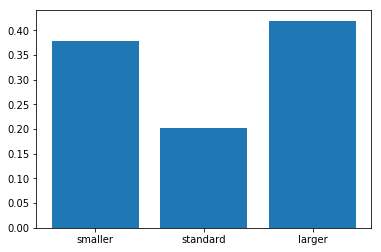

In [43]:
import numpy as np 
from matplotlib import pyplot as plt 

plt.bar(['smaller','standard','larger'], [a,b,c])

In [143]:
len(mis)

36679

In [44]:
print(kanban_df.columns)

Index(['船舶編號', '航次', '航行狀態(I進港O出港T移泊)', '引水申請時間', '引水人出發時間', '英文船名', '中文船名',
       '港口(1/2)', '移泊地', '靠泊地', '引水人姓名1', '引水人姓名2', '拖船編號1', '拖船編號2', '拖船編號3',
       '實際靠妥時間', '離開泊地時間', '港代理簡稱', '引水人上船時間', '引水人離船時間', '總噸位', '前吃水', '後吃水',
       '靠泊狀況(L左靠，R右靠，0不指定)'],
      dtype='object')
